<a href="https://colab.research.google.com/github/nachomendoza97/Data-Industrial/blob/main/APP_ABC_Sheets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

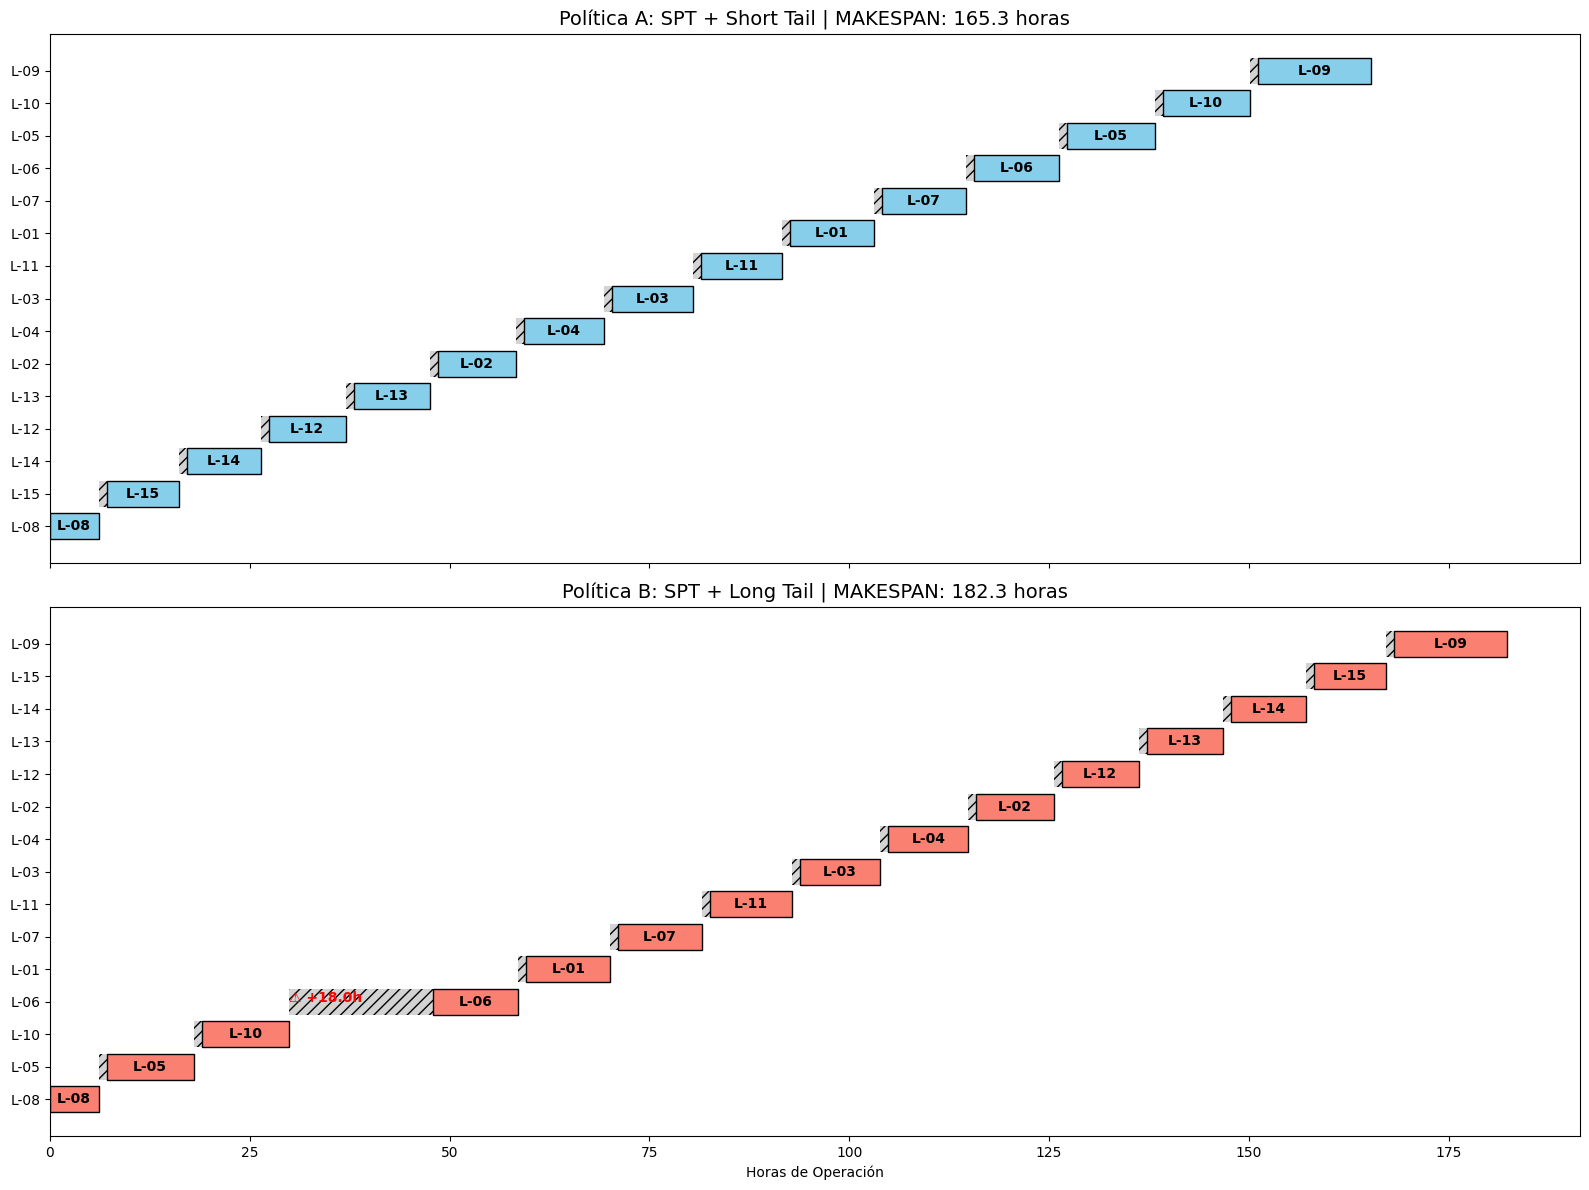

Diferencia de ahorro lograda: 17.0 horas.


In [ ]:
##Codigo de vinculacion de aplicaciones con plantillas de Google Sheets "Gestion de datos Industrial"
# 1. IMPORTACIÓN Y AUTENTICACIÓN
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# 2. CONEXIÓN A LA PLANILLA
# Reemplaza con el nombre exacto de tu archivo en Drive
nombre_planilla = "Gestión_Industrial_Datos"
wb = gc.open(nombre_planilla)

# --- FUNCIÓN PARA PROCESAR ABC ---
def procesar_abc_desde_sheets():
    hoja = wb.worksheet("IN_ABC")
    df = pd.DataFrame(hoja.get_all_records())

    # Lógica de Valor de Consumo y Clasificación
    df['Valor_Consumo'] = df['Costo_Unitario'] * df['Demanda_Anual']
    df = df.sort_values(by='Valor_Consumo', ascending=False).reset_index(drop=True)
    df['%_Acum_Items'] = (df.index + 1) / len(df)

    df['Categoria'] = df['%_Acum_Items'].apply(lambda x: 'A' if x <= 0.20 else ('B' if x <= 0.55 else 'C'))

    # Escribir en la pestaña de Resultados
    res_hoja = wb.worksheet("Resultados")
    res_hoja.clear() # Limpiar antes de escribir
    res_hoja.update([df.columns.values.tolist()] + df.values.tolist())
    print("Análisis ABC finalizado y exportado a Sheets.")

# Ejecutar procesos
procesar_abc_desde_sheets()